In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# # reading and saving information
# url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
# df = pd.read_csv(url)
# df.to_csv("user_information.csv", index=False)

In [26]:
df = pd.read_csv("user_information.csv", sep=',', encoding='utf-8')

# Generic Functions

In [54]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

In [58]:
def group_and_barplot(df: pd.DataFrame, group_col: str, target_col="default") -> sns.barplot:
    temp_df = df[[group_col, target_col]]

    temp_series = temp_df.groupby([group_col, target_col])
    temp_series = temp_series[group_col].count()

    temp_df = temp_series.to_frame().rename(columns={group_col: 'amount'}).reset_index()

    plt.figure(figsize=(15,6))
    plt.xticks(rotation=45)
    graph = sns.barplot(data=temp_df, x=group_col, y='amount', hue=target_col)

    return graph

# General Analysis

In [27]:
df.shape

(1000, 21)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [29]:
df.duplicated().sum()

0

In [30]:
df.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [31]:
df.default.value_counts()
# Unbalanced --> Accuracy isnt a good metric to measure the eficience
# If the model return 0 to all case, its accuracy will be 0.7 

default
0    700
1    300
Name: count, dtype: int64

In [32]:
df.dtypes == "object"

default                        False
conta_corrente                  True
prazo_emprestimo_meses         False
historico_credito               True
proposito_emprestimo            True
valor_emprestimo               False
reserva_cc                      True
tempo_emprego_atual             True
taxa_comp_salario              False
sexo_est_civil                  True
outros_fiadores                 True
anos_residencia_atual          False
propriedade                     True
idade                          False
outros_planos_financiamento     True
tipo_residencia                 True
n_creditos_banco               False
status_emprego                  True
n_dependentes                  False
telefone                        True
trabalhador_estrangeiro         True
dtype: bool

<Axes: >

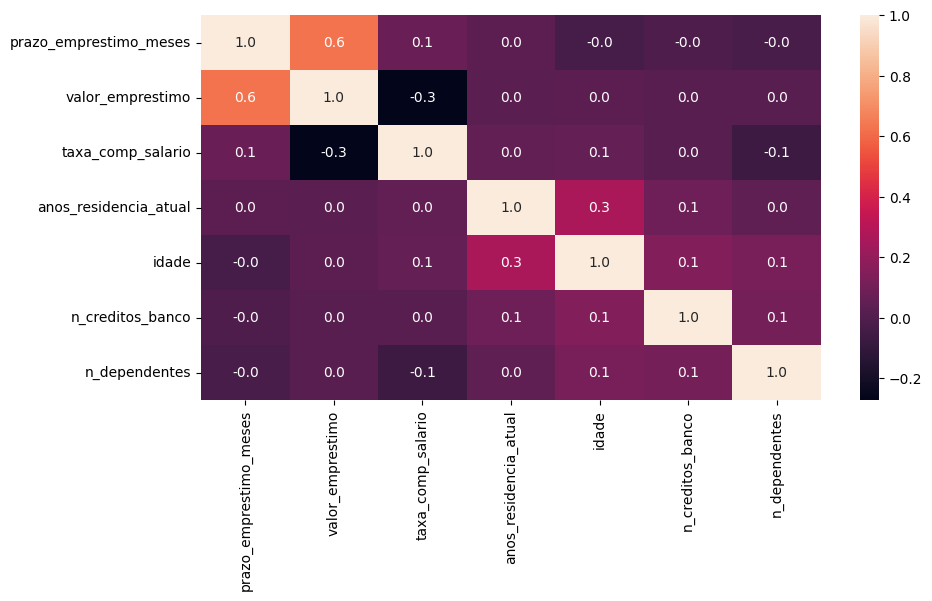

In [33]:
corr_matrix = df.select_dtypes("number").drop('default', axis=1).corr()

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.heatmap(corr_matrix, annot=True, fmt=".1f")

# No variables to be removed

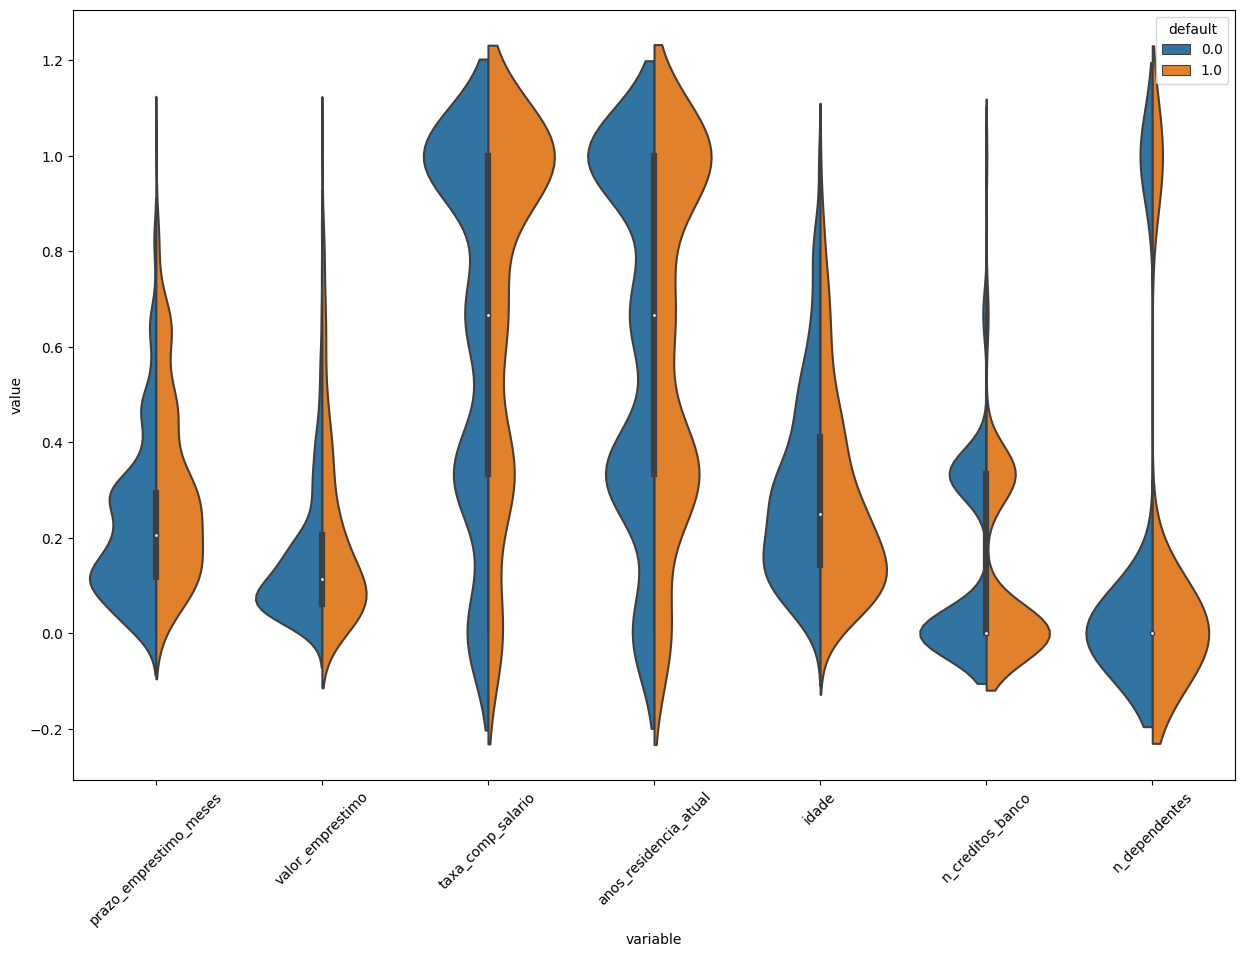

In [34]:
from sklearn.preprocessing import MinMaxScaler
# Select numeric columns for plotting
df_plot = df.select_dtypes("number")

# Normalize the values by variable using Min-Max scaling
scaler = MinMaxScaler()
df_plot_normalized = pd.DataFrame(scaler.fit_transform(df_plot), columns=df_plot.columns)

# Melt the DataFrame
df_melted = pd.melt(df_plot_normalized, id_vars="default",
                    var_name="variable",
                    value_name="value")

# Create the violin plot
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.violinplot(x="variable", y="value", hue="default", data=df_melted, split=True)
plt.show()


# Sex and Civil Status

In [35]:
# does sex have any meaning to this case?
df_sex = df[['sexo_est_civil', 'default']]
df_sex = df_sex.assign(sex=df.sexo_est_civil.apply(lambda x: x.split(' ')[0])).drop('sexo_est_civil', axis=1)

df_sex.groupby(['sex', 'default'])['sex'].count()

sex     default
female  0          201
        1          109
male    0          499
        1          191
Name: sex, dtype: int64

In [36]:
df_sex.sex.value_counts()

# It's notable that the sex doesn't help to reach any conclusion
# the amount of each target values in the male's case 
# is proportional to the female cases. 

# Ex: 201 woman that don't pay and 499 man
#     109 woman used to pay and 191 man
# In total, there are 690 males and 310 females

sex
male      690
female    310
Name: count, dtype: int64

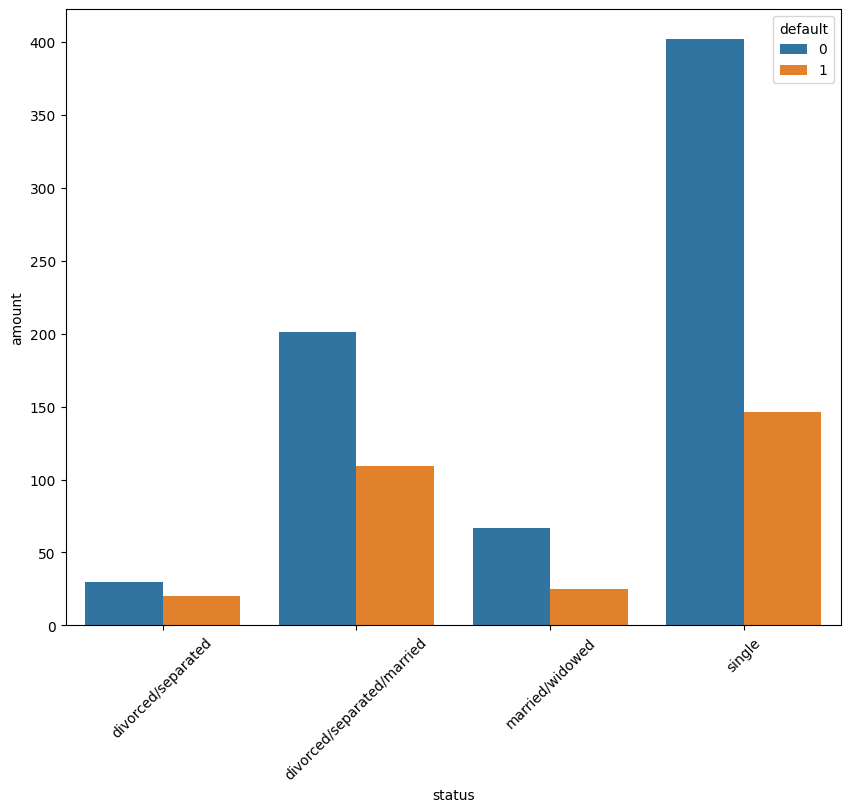

In [70]:
# does civil status have any meaning to this case?
df_civil_status = df[['sexo_est_civil', 'default']]
df_civil_status = df_civil_status.assign(status = df_civil_status.sexo_est_civil.apply(lambda x: x.split(" ")[-1]))

series_civil_status = df_civil_status.groupby(['status', 'default'])['status'].count()
df_civil_status = series_civil_status.to_frame().rename(columns={'status': 'amount'})
df_civil_status.reset_index(inplace=True)


plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
graph = sns.barplot(data=df_civil_status, x='status', y='amount', hue='default')

graph = graph

# The civil status impacts on the target class

# Propósito empréstimo

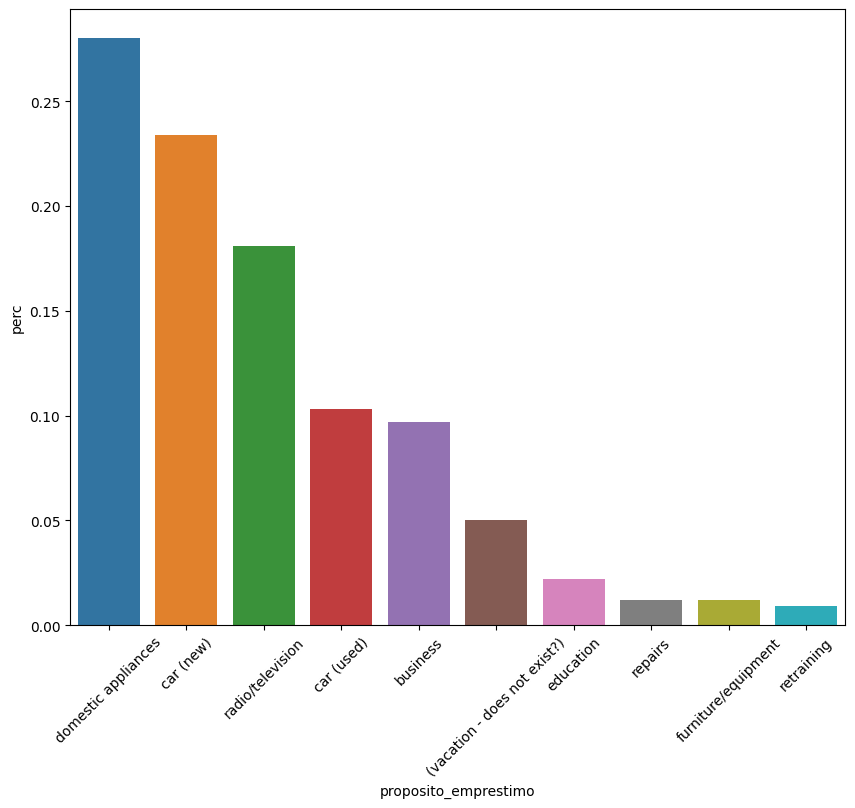

In [38]:
df_purpose = pd.DataFrame(df.proposito_emprestimo.value_counts()).reset_index().rename(columns={"count": "abs"})
df_purpose = df_purpose.assign(perc = lambda x: x['abs'] / df_purpose['abs'].sum())

plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
graph = sns.barplot(x='proposito_emprestimo', y='perc', data=df_purpose)

graph = graph

In [39]:
list(df_purpose[df_purpose['perc'] > 0.05]['proposito_emprestimo'])

['domestic appliances',
 'car (new)',
 'radio/television',
 'car (used)',
 'business']

# Time working in the current job

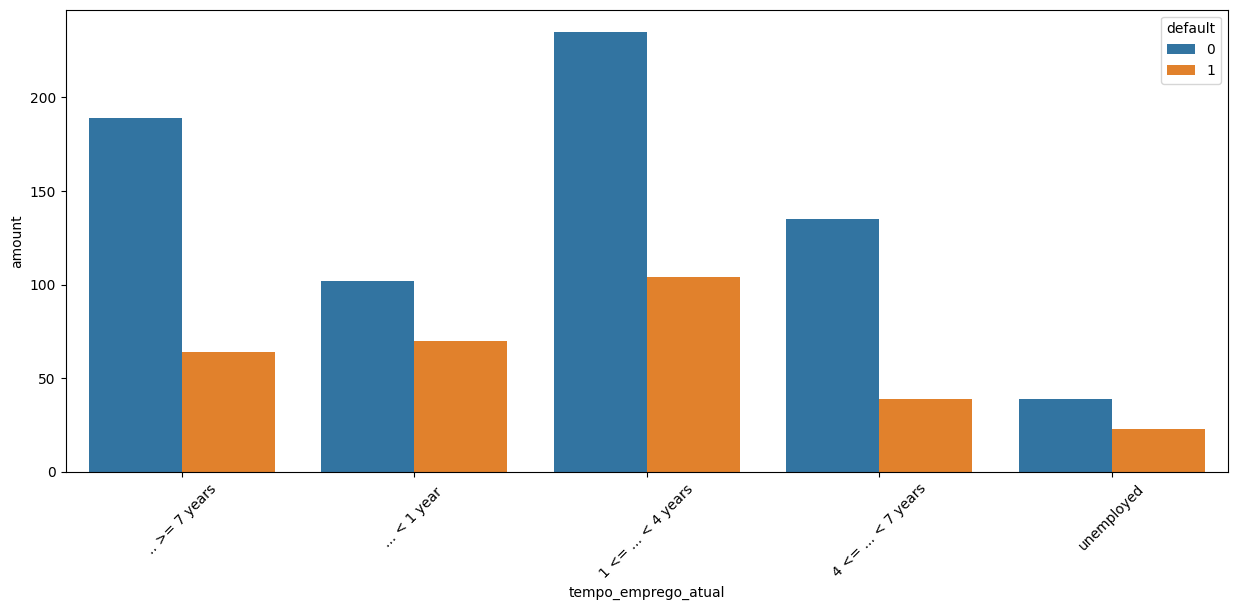

In [66]:
graph = group_and_barplot(df, "tempo_emprego_atual")


# status_emprego

In [41]:
df.status_emprego

0                            skilled employee / official
1                            skilled employee / official
2                                   unskilled - resident
3                            skilled employee / official
4                            skilled employee / official
                             ...                        
995                                 unskilled - resident
996    management/ self-employed/ highly qualified em...
997                          skilled employee / official
998                          skilled employee / official
999                          skilled employee / official
Name: status_emprego, Length: 1000, dtype: object

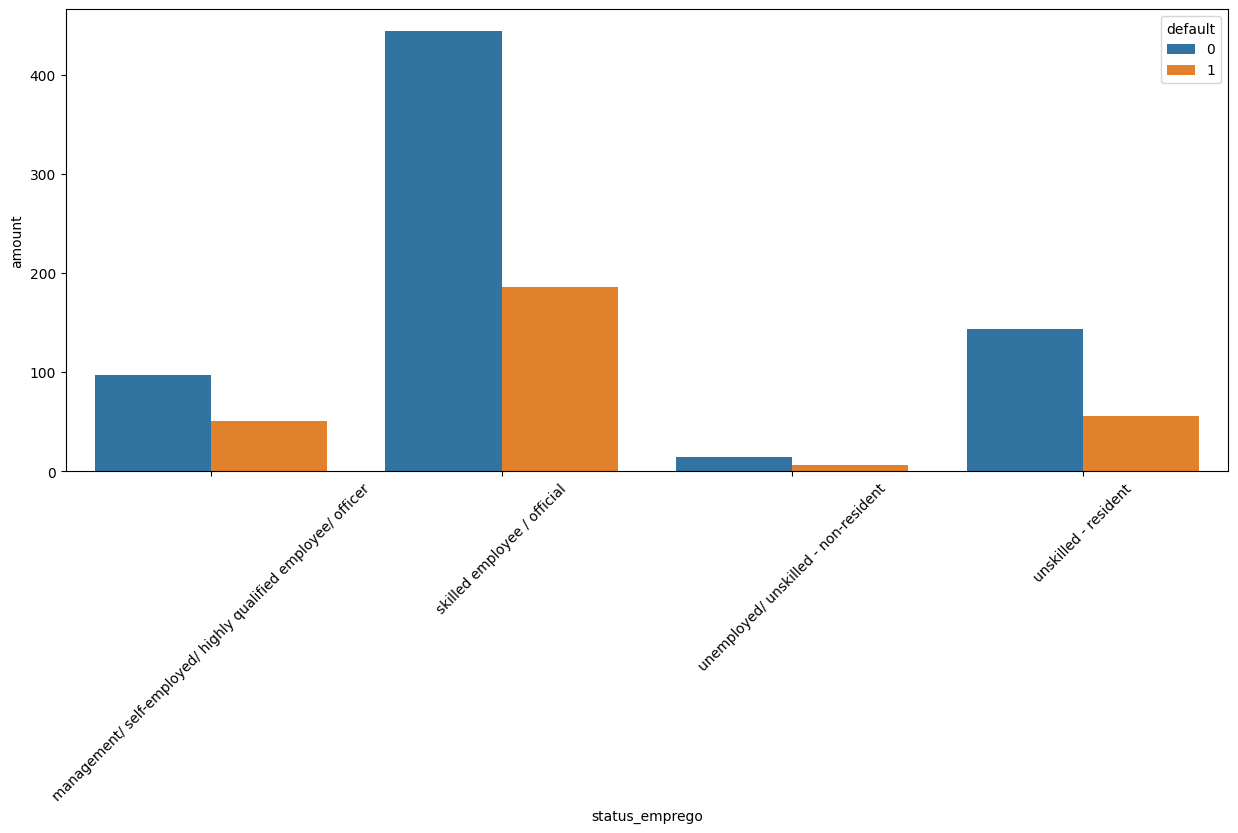

In [64]:
graph = group_and_barplot(df, "status_emprego")

# outros_fiadores

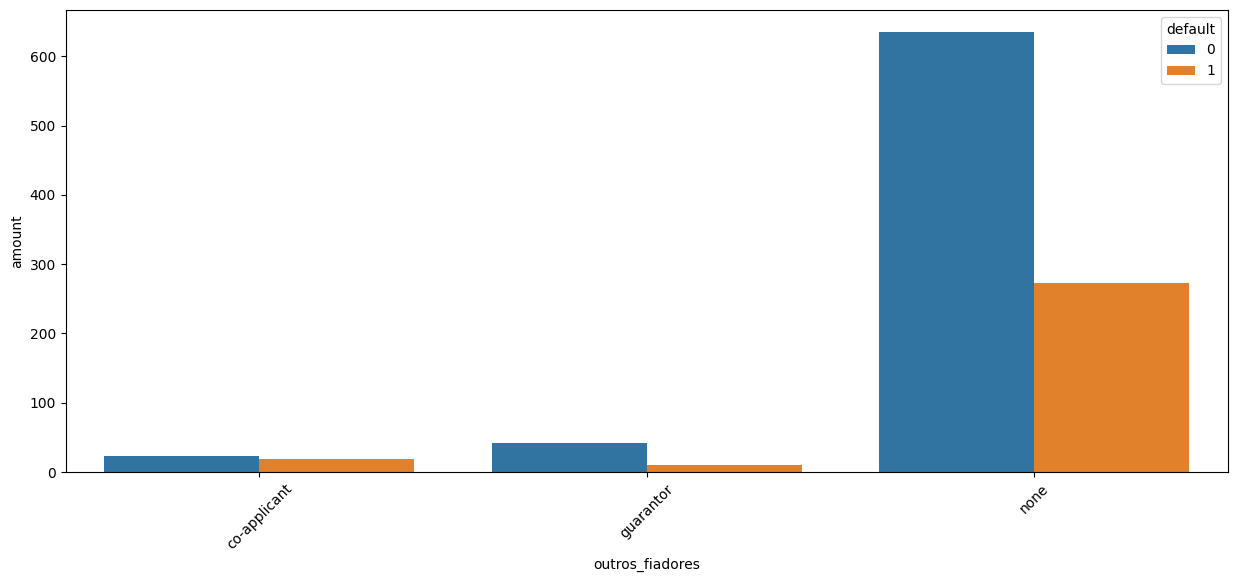

In [62]:
graph = group_and_barplot(df, "outros_fiadores")


# Outros Financiamentos

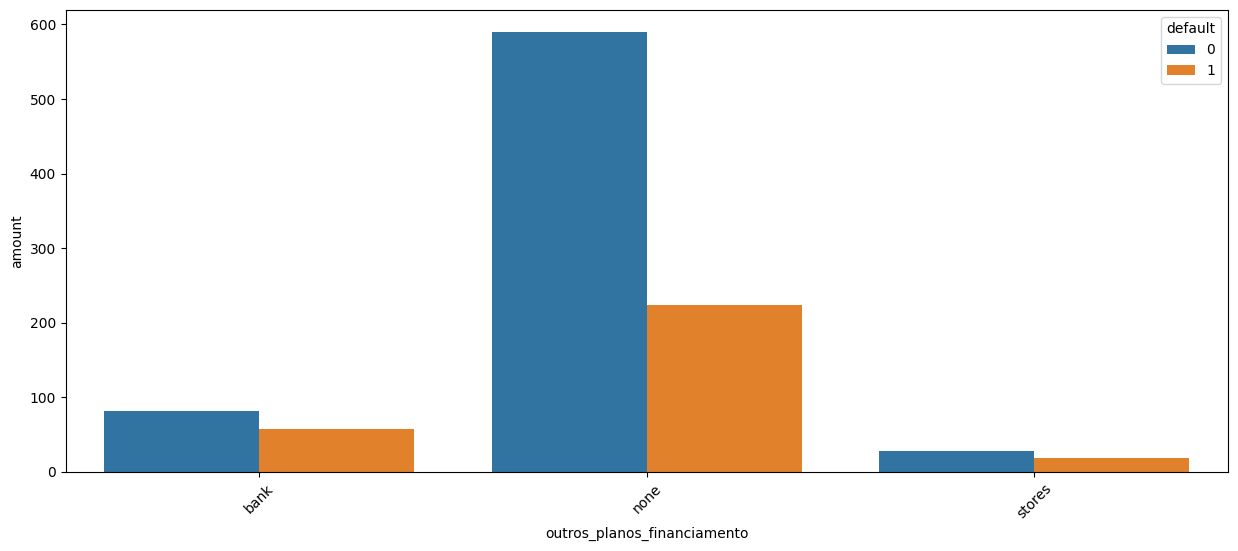

In [61]:
graph = group_and_barplot(df, "outros_planos_financiamento")

# Needed Fixes

In [ ]:
# Ordinal Categories, so it will be used 
# sequential integers
tr_cc = {}
cc_types = df.conta_corrente.value_counts().keys()

for index, cc in enumerate(cc_types):
    tr_cc[cc] = index + 1
    
df.conta_corrente = df.conta_corrente.map(tr_cc)

In [ ]:
# Bool Value
df.trabalhador_estrangeiro = df.trabalhador_estrangeiro.map({"yes": 1, "no": 0})

In [ ]:
telefone_to_bool = lambda x: 1 if x != "none" else 0

df.telefone = df.telefone.apply(telefone_to_bool)

# Generic Model Function


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np 


SEED = 7
np.random.seed(SEED)


def classifier(model, data, target):
    
    x, y = data.drop(target), data[target]
    train_x, test_x, train_y, test_y = train_test_split(x, y, train_size=0.3)
    
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
   
    class_report = classification_report(test_y, predictions)
    conf_natrix = confusion_matrix(test_y, predictions)
    
    return class_report, conf_natrix